In [14]:
import pandas as pd
income = pd.read_csv('income.csv')

income.rename(columns={'서울특별시': '서울', 'old_name2': 'new_name2'}, inplace=True)
income['광역시'] = income['부산광역시'] + income['대구광역시'] + income['인천광역시'] + income['광주광역시'] + income['대전광역시'] + income['울산광역시']
income['대도시외'] = income['세종특별자치시'] + income['경기도'] + income['강원특별자치도'] + income['충청북도'] + income['충청남도'] + income['전북특별자치도'] + income['전라남도'] + income['경상북도'] + income['경상남도'] + income['제주특별자치도']
new_income = income.loc[:, ['시점', '서울', '광역시', '대도시외']]
new_income.head()

,시점,서울,광역시,대도시외
0,2015,416886307,400708586,1026316703
1,2016,431299923,407072559,1063403101
2,2017,442507582,413488239,1110115165
3,2018,460496443,419813638,1146199529
4,2019,475206455,427861462,1172426907


In [15]:
new_income['시점'] = pd.to_datetime(new_income['시점'], format='%Y', errors='coerce')

# 각 지역별 데이터 숫자형으로 변환 (문자열에서 숫자로 변환)
for column in ['서울', '광역시', '대도시외']:
    new_income[column] = pd.to_numeric(new_income[column], errors='coerce')

new_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시점      8 non-null      datetime64[ns]
 1   서울      8 non-null      int64         
 2   광역시     8 non-null      int64         
 3   대도시외    8 non-null      int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 388.0 bytes


In [16]:
# 월별 인덱스 생성
monthly_index = pd.date_range(start=new_income['시점'].min(), end=new_income['시점'].max(), freq='ME')

# 월별 데이터 프레임 생성
monthly_income = pd.DataFrame()

# 각 지역별 데이터를 추가
for column in ['서울', '광역시', '대도시외']:
    # 해당 지역의 연도별 데이터만 선택하고 인덱스를 연도 형태로 변환
    yearly_data = new_income.set_index('시점')[column]
    
    # 보간을 위한 리샘플링
    monthly_data = yearly_data.resample('ME').mean()  # 평균으로 리샘플링
    monthly_data = monthly_data.interpolate(method='linear')  # 선형 보간
    monthly_income[column] = monthly_data.astype(int)

# 시점 포맷 변환
monthly_income.reset_index(inplace=True)
monthly_income.rename(columns={'index': '시점'}, inplace=True)
monthly_income['시점'] = monthly_income['시점'].dt.strftime('%Y.%m')

monthly_income.head(12), monthly_income.shape

# # 데이터 저장 (선택 사항)
# monthly_income.to_csv('monthly_income.csv')

(         시점         서울        광역시        대도시외
 0   2015.01  416886307  400708586  1026316703
 1   2015.02  418087441  401238917  1029407236
 2   2015.03  419288576  401769248  1032497769
 3   2015.04  420489711  402299579  1035588302
 4   2015.05  421690845  402829910  1038678835
 5   2015.06  422891980  403360241  1041769368
 6   2015.07  424093115  403890572  1044859902
 7   2015.08  425294249  404420903  1047950435
 8   2015.09  426495384  404951234  1051040968
 9   2015.10  427696519  405481565  1054131501
 10  2015.11  428897653  406011896  1057222034
 11  2015.12  430098788  406542227  1060312567,
 (85, 4))

<Axes: >

c:\Users\user\anaconda3\envs\myConda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\myConda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\myConda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\myConda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\myConda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\myConda\Lib\sit

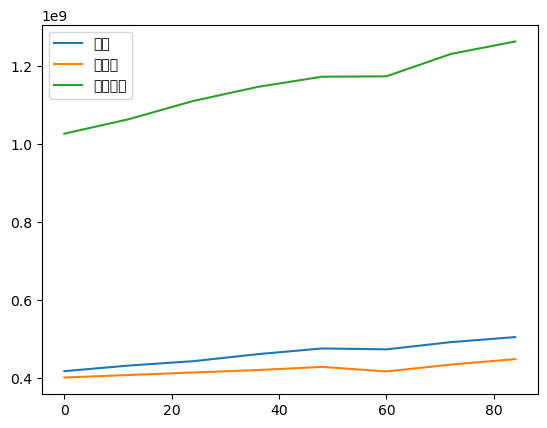

In [17]:
monthly_income.plot()